# 7.11. The Knight’s Tour Problem
The object of the puzzle is to find a sequence of moves that allow the knight to visit every square on the board exactly once.
https://en.wikipedia.org/wiki/Knight%27s_tour


# 7.12. Building the Knight’s Tour Graph
- Each square on the chessboard can be represented as a node in the graph.
- Each legal move by the knight can be represented as an edge in the graph.
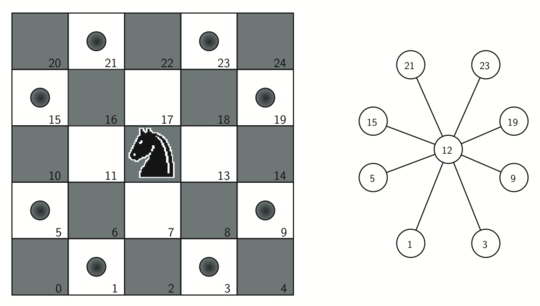

In [10]:
from pythonds.graphs import Graph

# One pass over the entire board
def knightGraph(bdSize):
    ktGraph = Graph()
    for row in range(bdSize):
       for col in range(bdSize):
           nodeId = posToNodeId(row,col,bdSize)
           # Create a list of legal moves for that position on the board
           newPositions = genLegalMoves(row,col,bdSize)
           for e in newPositions:
               nid = posToNodeId(e[0],e[1],bdSize)
               ktGraph.addEdge(nodeId,nid)
    return ktGraph

def posToNodeId(row, column, board_size):
    return (row * board_size) + column

def genLegalMoves(x,y,bdSize):
    newMoves = []
    moveOffsets = [(-1,-2),(-1,2),(-2,-1),(-2,1),
                   ( 1,-2),( 1,2),( 2,-1),( 2,1)]
    for i in moveOffsets:
        newX = x + i[0]
        newY = y + i[1]
        if legalCoord(newX,bdSize) and legalCoord(newY,bdSize):
            newMoves.append((newX,newY))
    return newMoves

def legalCoord(x,bdSize):
    if x >= 0 and x < bdSize:
        return True
    else:
        return False

## Example of a complete graph of possible moves on an eight-by-eight board.
- 336 edges
- The edges of the board have fewer connections (legal moves) than the middle nodes.
- The graph is sparse.
  - Fully connected graph: 4,096 edges
  - 8.2%

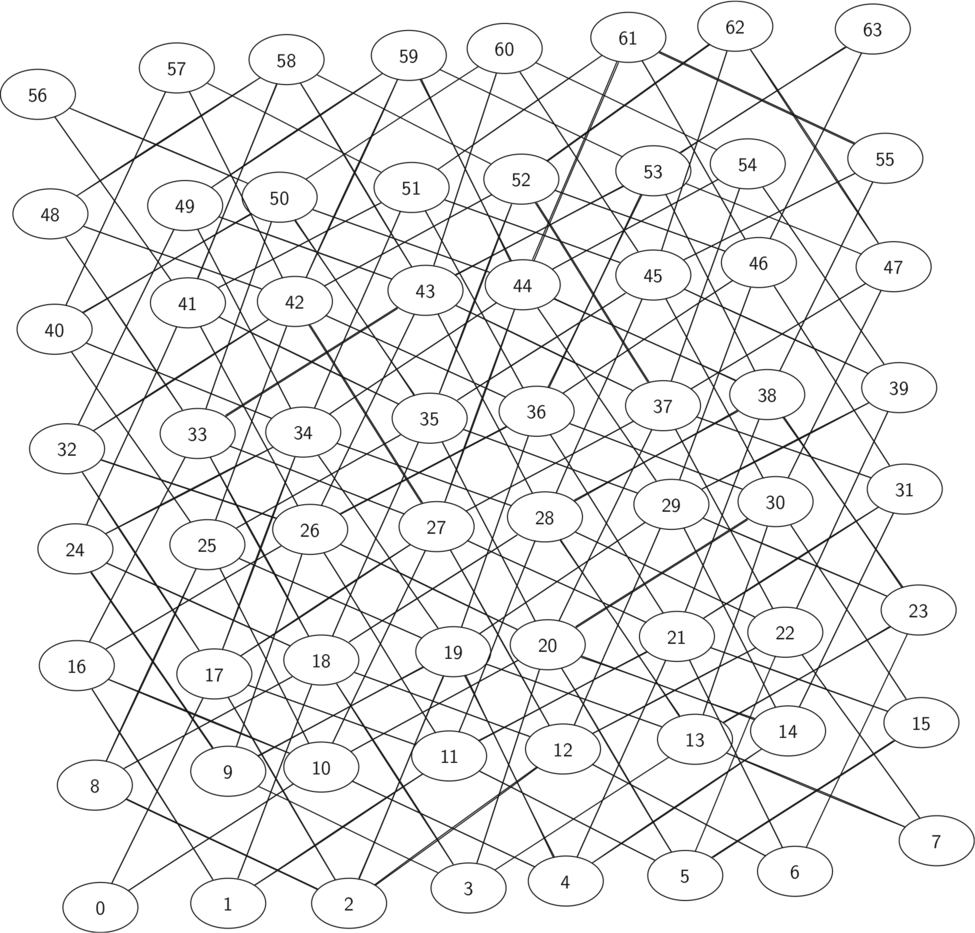

# 7.13. Implementing Knight’s Tour
## Depth First Search (DFS)
- A depth first search creates a search tree by exploring one branch of the tree as deeply as possible.
- Two solutions to solve the knight’s tour problem
  - Explicitly forbidding a node to be visited more than once
  - Allows nodes to be visited more than once as the tree is constructed

In [18]:
from pythonds.graphs import Graph, Vertex

"""
Parameters
- n: the current depth in the search tree
- path: a list of vertices visited up to this point
- u: the vertex in the graph we wish to explore
- limit: the number of nodes in the path
"""
def knightTour(n,path,u,limit):
        u.setColor('gray')
        path.append(u)
        if n < limit:
            nbrList = list(u.getConnections())
            i = 0
            done = False
            while i < len(nbrList) and not done:
                if nbrList[i].getColor() == 'white':
                    done = knightTour(n+1, path, nbrList[i], limit)
                i = i + 1
            if not done:  # prepare to backtrack
                path.pop()
                u.setColor('white')
        else:
            done = True
        return done

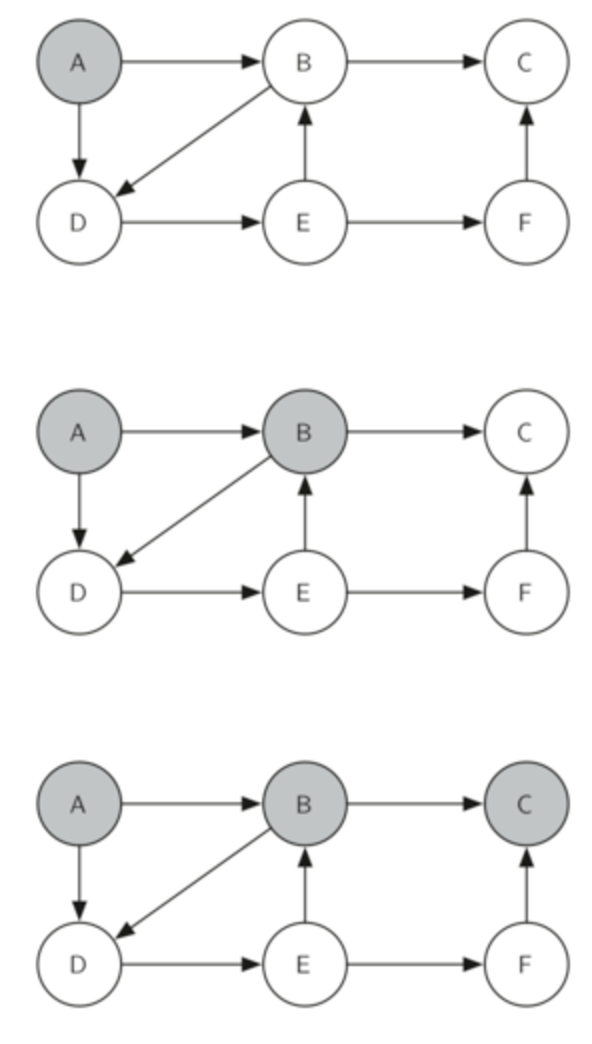
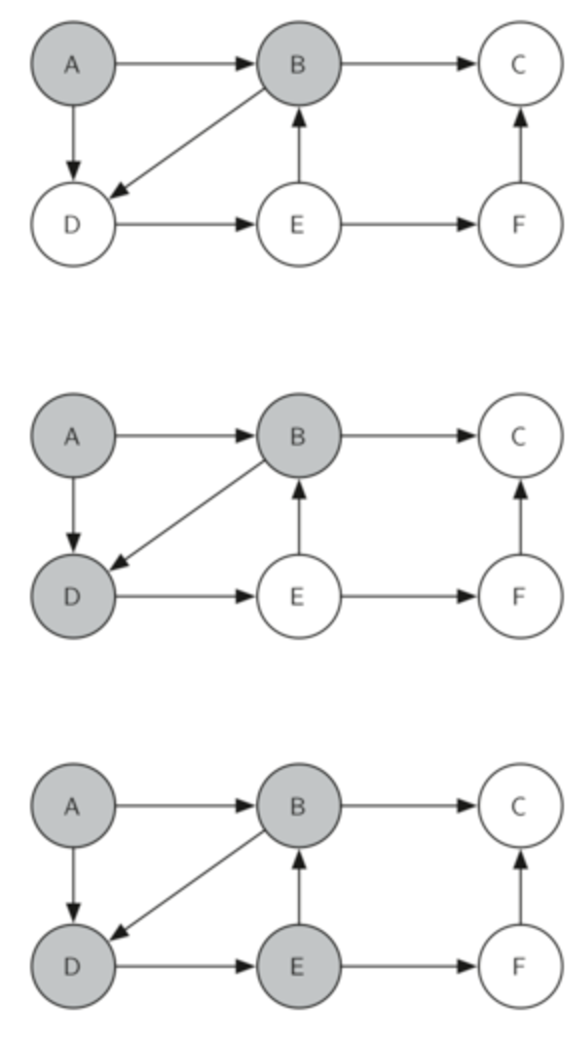
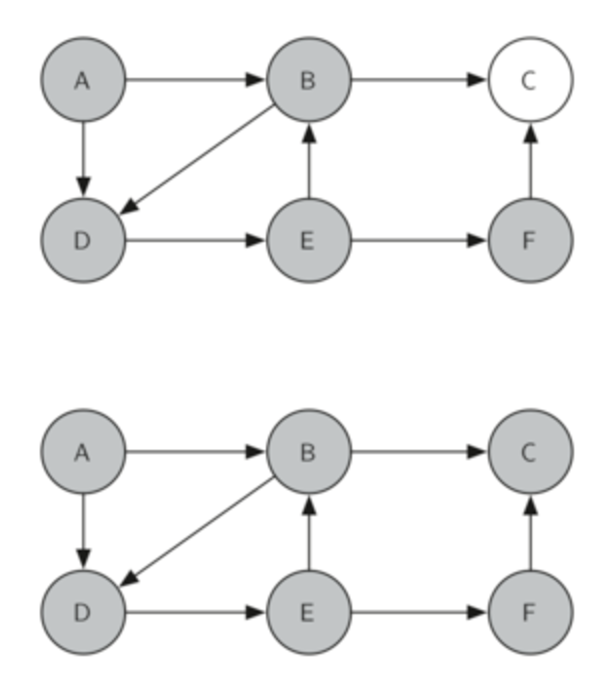

## Example of an implementation
- python 2.7, pygame
- https://github.com/RodolfoFerro/KnightsTour

# 7.14. Knight’s Tour Analysis
- O(k^n)
- k: small constant (5.25 on 8 x 8 board)
- n: number of squares on the board

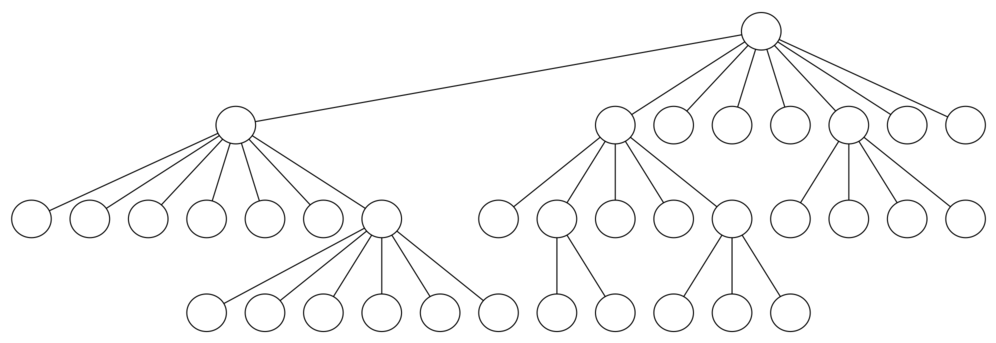

- root: starting point of the search

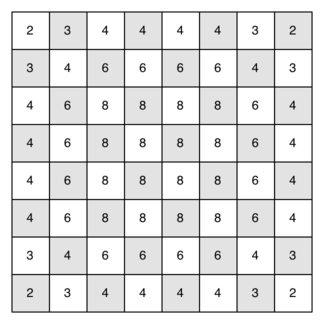

- Counts of legal moves

## Warnsdorff’s algorithm
- Select the vertex to go next that has the fewest available moves.
- Visiting the squares with the fewest available moves first pushes the knight to visit the squares around the edges of the board first.

In [19]:
def orderByAvail(n):
    resList = []
    for v in n.getConnections():
        if v.getColor() == 'white':
            c = 0
            for w in v.getConnections():
                if w.getColor() == 'white':
                    c = c + 1
            resList.append((c,v))
    resList.sort(key=lambda x: x[0])
    return [y[1] for y in resList]